In [1]:
from loss.mnist_lenet import *
from solvers.ao_exp_ftrl import fmin 
import numpy as np

In [2]:
maxfev=300
train_loss=[]
cem = CEM(index=344)
func=PP_Loss(cem)
func_p=PP_Grad(cem)
#func_p=Grad_2p(func=func, delta=0.001, n=10)
l1=0.06
l2=0.006
s=np.linalg.svd(cem.pp_init,full_matrices=False,compute_uv=False)
regl1=np.linalg.norm(s.flatten(),ord=1)
regl2=np.linalg.norm(cem.pp_init.flatten(),ord=2)**2
attack=func(cem.pp_init)
print('iteration: ',0,' attack: ', attack,' loss: ',1.0,' l1: ',regl1,' l2: ',regl2 )
init_loss=attack+l1*regl1+0.5*l2*regl2+1.0
train_loss.append(1.0)
def callback(res):
    s=np.linalg.svd(res.x,full_matrices=False,compute_uv=False)
    regl1=np.linalg.norm(s.flatten(),ord=1)
    regl2=np.linalg.norm(res.x.flatten(),ord=2)**2
    cur_loss=res.func+l1*regl1+0.5*l2*regl2+1.0
    print('iteration: ',res.nit,' attack: ', res.func,' loss: ',cur_loss/init_loss,' l1: ',regl1,' l2: ',regl2 )
    train_loss.append(cur_loss/init_loss)
result = fmin(func=func, func_p=func_p, x0=cem.pp_init, lower=cem.pp_lower, upper=cem.pp_upper,l1=l1,l2=l2,maxfev=maxfev,callback=callback,epoch_size=10)

iteration:  0  attack:  -1.9793376  loss:  1.0  l1:  21.776280234319607  l2:  77.37342683679371


/home/dai/shao/optimisationpy/solvers/ao_exp_ftrl.py:59: RuntimeWarning: invalid value encountered in log
  x_val = np.where(abc>=15.0,np.log(abc)-np.log(np.log(abc))+np.log(np.log(abc))/np.log(abc), lambertw( np.exp(abc), k=0).real )/b-a


iteration:  10  attack:  -1.9384181  loss:  -0.6163331401711322  l1:  9.18264268456829  l2:  14.235926164048974
iteration:  20  attack:  -1.8955343  loss:  -0.9365937384470023  l1:  5.890524346997509  l2:  6.070063582620478
iteration:  30  attack:  -1.8873115  loss:  -1.0064161783964223  l1:  5.193829999873717  l2:  4.2443955331069985
iteration:  40  attack:  -1.8993292  loss:  -1.0259728712960432  l1:  5.220520104804097  l2:  4.0700949396276656
iteration:  50  attack:  -1.8975351  loss:  -1.0239023548336545  l1:  5.212163406994592  l2:  4.025249992470348
iteration:  60  attack:  -1.8895065  loss:  -1.0154267632872882  l1:  5.162503694953944  l2:  3.922536363284249
iteration:  70  attack:  -1.8822278  loss:  -1.0059421261875918  l1:  5.133748059082564  l2:  3.8398628368677374
iteration:  80  attack:  -1.8748682  loss:  -0.9914627327916752  l1:  5.145744451728169  l2:  3.8464558682274625
iteration:  90  attack:  -1.8744054  loss:  -0.9886926044633765  l1:  5.163741402913922  l2:  3.8487


[8.]
<NDArray 1 @cpu(0)>

[8.]
<NDArray 1 @cpu(0)>
(28, 28)


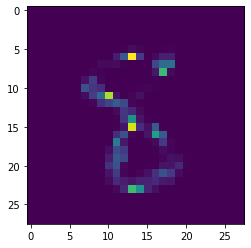

In [3]:
import matplotlib.pyplot as plt
pn = np.zeros(shape=result.x.shape)
pn[:]=result.x
print(cem.label)
print(cem.predict(pn))
pn=np.squeeze(pn)
plt.imshow(pn)
print(pn.shape)